In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
###comment
#train_loss=history.history['loss']
#val_loss=history.history['val_loss']
#sx=range(6)
#plt.figure(1,figsize=(7,5))
#plt.plot(sx,train_loss)
#plt.plot(sx,val_loss)
#plt.xlabel("No. of epochs")
#plt.ylabel("Loss")
#plt.title("Train_loss vs val_loss")
#plt.grid(True)
#plt.legend(['Train','Val'])

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Collect data**

In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (180,180))
        X.append(img)
        Y.append(classes[cls])

**Data Analysis**

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape, X_updated.shape

((1222, 180, 180), (1222, 32400))

**Data  Visualization**

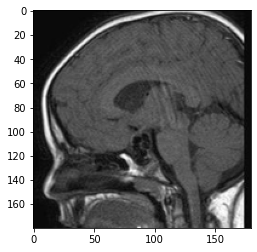

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 32400)

**Split Data**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 32400), (245, 32400))

**Feature Scalling**

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


**Feature Selection**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 32400) (245, 32400)


**Model Training**

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9918116683725691
Testing Score: 0.9551020408163265


In [ ]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 58,  65,  67,  87,  96, 127, 138, 149, 158, 159, 236]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[58],ytest[58])

Total Misclassified Samples:  11
0 1


In [ ]:
print("Accuracy for svm:",accuracy_score(ytest,pred))

Accuracy for svm: 0.9551020408163265


In [ ]:
confusion_matrix(ytest,pred)

array([[ 72,   9],
       [  2, 162]])

In [ ]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        81
           1       0.95      0.99      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.94      0.95       245
weighted avg       0.96      0.96      0.95       245



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [ ]:
pred2=lg.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 58,  65,  67,  87,  96, 127, 138, 149, 158, 159, 236]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred2[58],ytest[58])

Total Misclassified Samples:  11
0 1


In [ ]:
print("Accuracy for logistic:",accuracy_score(ytest,pred2))

Accuracy for logistic: 0.9591836734693877


In [ ]:
confusion_matrix(ytest,pred2)

array([[ 73,   8],
       [  2, 162]])

In [ ]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        81
           1       0.95      0.99      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.94      0.95       245
weighted avg       0.96      0.96      0.96       245



**CNN**

In [ ]:
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'../content/drive/MyDrive/brain_tumor/Training/pituitary_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
paths = []
for r, d, f in os.walk(r"../content/drive/MyDrive/brain_tumor/Training/no_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(1222, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(1222,2)
result.shape

(1222, 2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=result, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(977, 2)

In [ ]:
x_train.shape

(977, 128, 128, 3)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))


Epoch 1/30
25/25 [==============================] - 12s 100ms/step - loss: 9.1146 - accuracy: 0.8342 - val_loss: 69.8037 - val_accuracy: 0.3714
Epoch 2/30
25/25 [==============================] - 2s 61ms/step - loss: 1.1744 - accuracy: 0.9447 - val_loss: 19.1696 - val_accuracy: 0.3714
Epoch 3/30
25/25 [==============================] - 1s 58ms/step - loss: 0.4937 - accuracy: 0.9744 - val_loss: 5.3530 - val_accuracy: 0.4939
Epoch 4/30
25/25 [==============================] - 2s 61ms/step - loss: 0.1094 - accuracy: 0.9857 - val_loss: 1.5840 - val_accuracy: 0.7959
Epoch 5/30
25/25 [==============================] - 1s 60ms/step - loss: 0.1682 - accuracy: 0.9857 - val_loss: 0.2994 - val_accuracy: 0.9469
Epoch 6/30
25/25 [==============================] - 2s 62ms/step - loss: 0.0907 - accuracy: 0.9928 - val_loss: 0.3711 - val_accuracy: 0.9510
Epoch 7/30
25/25 [==============================] - 2s 61ms/step - loss: 0.0962 - accuracy: 0.9898 - val_loss: 0.2899 - val_accuracy: 0.9633
Epoch 8/3

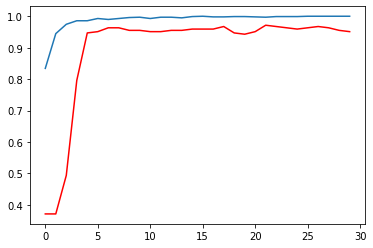

In [ ]:
h=history.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

In [ ]:
pred3=model.predict(x_test)

8/8 [==============================] - 1s 37ms/step


In [ ]:
pred3=np.argmax(pred3,axis=1)
y_test=np.argmax(y_test,axis=1)



In [ ]:
print("Accuracy for CNN:",accuracy_score(y_test,pred3))

Accuracy for CNN: 0.9510204081632653


In [ ]:
confusion_matrix(y_test,pred3)

array([[ 79,  12],
       [  0, 154]])

In [ ]:
y_test.shape


(245,)

In [ ]:
x_test.shape

(245, 128, 128, 3)

In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        91
           1       0.93      1.00      0.96       154

    accuracy                           0.95       245
   macro avg       0.96      0.93      0.95       245
weighted avg       0.95      0.95      0.95       245



**Testing**

**SVM Model test**


In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

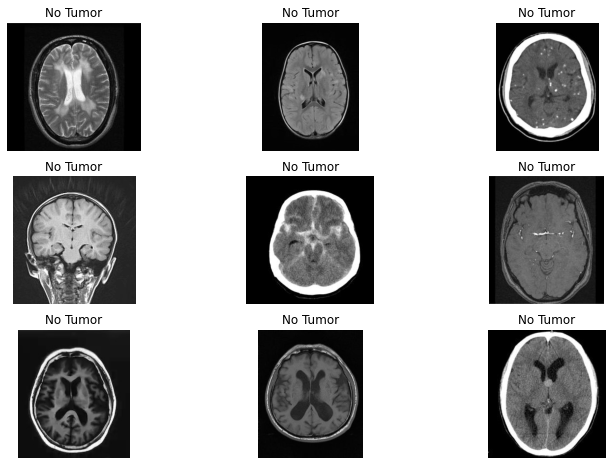

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

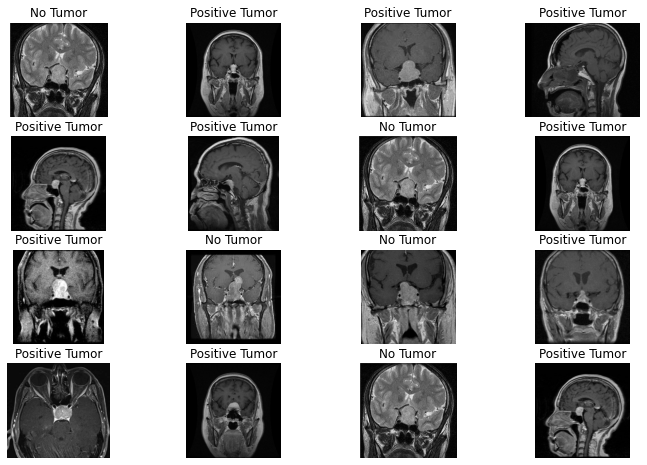

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/')[30:46]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

**Logistic Regression Model Test**

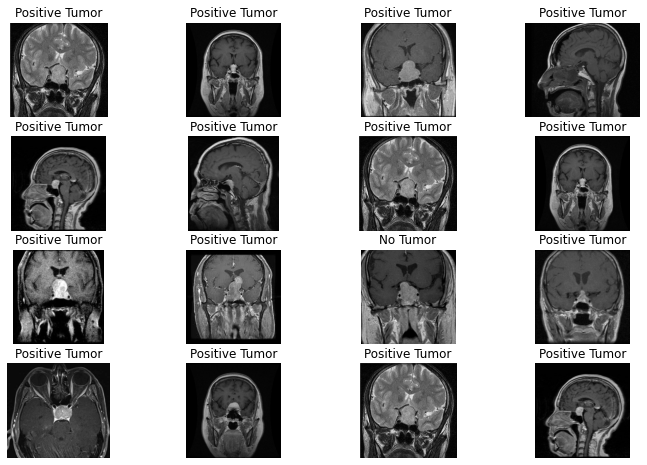

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/')[30:46]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

CNN Model Test

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [ ]:
def names(number):
    if number==1:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


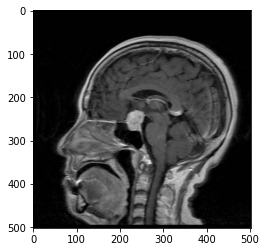

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/image(19).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
pred4 = model.predict_on_batch(x)
classification = np.where(pred4 == np.amax(pred4))[1][0]
imshow(img)
print(str(pred4[0][classification]*100) + '% Confidence This Is ' + names(classification))